# Tutorial 11: Testing and Debugging

## PHYS 2600

In [3]:
# Import cell
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np

## T11.X - Programming with intent (worked example)

_(Special note: as a worked example, you are encouraged to fill this in along with me in class, but you won't be graded on whether you've completed it or not.)_

Let's start this tutorial with a worked example, going from start to finish on a short program while following the three rules of programming with intent:

1. Documenting our code
2. Writing clean code
3. Testing our code

Here's the exercise: we'd like to write a function `minmax()` which will __find and return both the smallest and largest elements in an array of numbers__.  Just to make it more interesting, we will _not_ use the built-in `max()` and `min()` methods, which already do part of the task for us.

Let's begin with design: making our intent more concrete.  We want the smallest and largest elements in a list of numbers; __what is our algorithm?__

In [2]:
### BEGIN SOLUTION
# There are multiple possibilities here, as is usually the case.  This problem is related to the problem of sorting:
# if we sorted the array from smallest to largest, then we know the min and max entries are just the ones on the end.
# But this is over-engineered; we don't need to sort the whole array, just find two values.

# We will adopt a simple exhaustive search algorithm, also known as "linear search".  There are more complex algorithms
# available that do slightly better - see https://www.geeksforgeeks.org/maximum-and-minimum-in-an-array/.

# Here is the linear search algorithm:

# 1. Create two "register" variables, current_min and current_max.
# 2. Iterate through the array.  For each value:
#   a) If the value is below current_min, then replace current_min with it.
#   b) If the value is above current_max, then replace current_max with it.

### END SOLUTION

Now, let's implement our function.  We'll do the following steps:

1. Write the function signature and docstring.
2. Outline the algorithm in comments.
3. Implement the code.
4. Write some tests, and debug.

In [41]:
### BEGIN SOLUTION
def minmax(search_array):
    """
    Finds the min/max values in an array.

    Args:
        search_array: array to be searched.  Should be numeric.

    Returns:
        (min, max): length-2 array of min and max values in search_array.
        [Special case: returns None if search_array is empty.]

    """

    # Create "register" variables to store min/max at current point in search.
    ## Turns out 0 is a bad initial value, because it might be below everything in the array!
    #    current_min = 0
    #    current_max = 0

    # Now we must explicitly check for an empty array:
    if len(search_array) == 0:
        return None

    current_min = search_array[0]
    current_max = search_array[0]

    # Iterate through the array - take note of this pattern!
    i = 0
    while i < len(search_array):
        # Get current value from array
        value = search_array[i]

        # If current value is below current_min, it becomes the new current_min
        if value < current_min:
            current_min = value

        # If current value is above current_max, it becomes the new current_max
        if value > current_max:
            current_max = value

        # Next iteration
        i += 1

    # Return (min, max)
    return np.array([current_min, current_max])


### END SOLUTION

Now we need some tests!  We'll start with short lists where it's obvious what the min/max are.  Let's just start by `print`ing the test results to see if they match our expectations.

In [42]:
### BEGIN SOLUTION
print(minmax(np.array([1, 3, 5, 7])))
print(minmax(np.array([3.7, 4.4, 1003.3])))
print(minmax(np.arange(50)))
print(minmax(np.array([-3, 0, 4])))
### END SOLUTION

[1 7]
[   3.7 1003.3]
[ 0 49]
[-3  4]


Once that's working, we should try some more interesting or unusual cases, to make sure our program still behaves as expected.  (Some things to consider: negative numbers?  Lists of length one, or length zero?  

In [45]:
### BEGIN SOLUTION
print(minmax(np.array([3])))
print(minmax(np.array([])))
print(minmax(np.array([-7, -3, -1])))
print(minmax(np.array(["Q", "A", "X", "M", "P"])))
### END SOLUTION

[3 3]
None
[-7 -1]
['A' 'X']


## T11.1 - Debugging

Both of the examples below are buggy code - they have something wrong with them!  Use your knowledge of black-box and glass-box testing to test and fix each example.

### Part A

The _intent_ of the code below is to count how many odd numbers there are between 1 and n (including n itself, if n is odd.)

```python
def count_odds(n):
    i = 0
    while i < n:        
        if (i % 2 == 1):
            total += n
        
        i += 1
        
    return total
    
print(count_odds(6))  # 1,3,5 --> should print 3
print(count_odds(7))  # 1,3,5,7 --> should print 4
```

In [2]:
def count_odds(n):
    i = 0
    total = 0  # Need to initialize total!

    # <= to include n!
    while i <= n:
        if i % 2 == 1:
            total += 1  # Add 1, not  - we're counting, not summing!

        i += 1

    return total


print(count_odds(6))  # 1,3,5 --> should print 3
print(count_odds(7))  # 1,3,5,7 --> should print 4

3
4


### Part B

The _intent_ of the code below is to count how many negative numbers there are in an array, and return it.   (Yes, it's easier to do this with a mask; but explicit loops are more interesting to debug!) 

This time it passes the test I wrote, so maybe there's nothing for you to do?  Or maybe you should write some more tests...

```python
def how_many_negative_numbers(my_array):
    count_negative = 0
    i = 0
    
    while i < len(my_array):
        number = my_array[i]
        if number > 0:
            break
        count_negative += 1
        i += 1
        
    return count_negative

    
print(how_many_negative_numbers(np.array([-4, -1, 0, 7, -3])))
# prints 3, so the code works...right?

```

In [77]:
def how_many_negative_numbers(my_array):
    count_negative = 0
    i = 0

    while i < len(my_array):
        number = my_array[i]
        if number >= 0:  # Don't include zero!
            i += 1
            continue  # Skip to next number, don't break!
        count_negative += 1
        i += 1

    return count_negative


print(how_many_negative_numbers(np.array([-4, -1, 0, 7, -3])))
# still prints 3...

print(how_many_negative_numbers(np.array([10, -3, -4, -1, 7, 0])))
# prints 0 in the original code, but 3 now!

3
3


## T11.2 - Finding the range (with intent)

Your turn to program an algorithm _with intent_, and debug it!  Suppose we're writing a simulation of two-dimensional ballistics, i.e. the motion of projectiles under the influence of gravity.  For simplicity, let's assume our projectile always starts at $(0,0)$, and is released with initial launch speed $v_0$ at angle $\theta$ from the horizontal.  Then its trajectory will be:

$$
x(t) = (v_0 \cos \theta) t \\
y(t) = (v_0 \sin \theta) t - \frac{1}{2} g t^2 \\
$$

As one small part of our simulation, we'd like to implement a function `find_range(x,y)`, which will take two arrays `x` and `y` containing the trajectory $(x(t), y(t))$ and use them to find the __range of the projectile__, i.e. the value of $x$ at which it comes back to the ground at $y=0$.

(Of course, in this case we could just solve analytically for the range, and no doubt such a formula is in most textbooks.  But if we were solving with air resistance, then we would need a function like this!  In fact, you will probably need it later this semester...)

Let's start by finding a trajectory - run the cell below to populate two arrays `x_traj` and `y_traj`, and use them to make a plot.

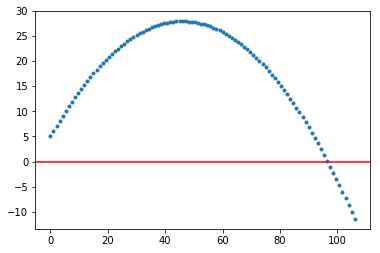

In [34]:
g = 9.8  # m/s^2
v0 = 30  # m/s
theta = 45 * np.pi / 180
T = 5  # s
y0 = 5  # m

# Create array of t-values for trajectory
t = np.linspace(0, 5, 100)

# Get trajectory given the above
x_traj = v0 * np.cos(theta) * t
y_traj = y0 + v0 * np.sin(theta) * t - 0.5 * g * t**2

# Plot the trajectory
plt.plot(x_traj, y_traj, linestyle=" ", marker=".")

# Add a horizontal line to show the ground
plt.axhline(0, color="r")

The plot already tells us that the answer should be somewhere around 90.  (Just making plots is frequently one of the most powerful tools in your debugging toolkit!)

Let's begin with design: making our intent more concrete.  __What is our algorithm for finding the range?__  This is a trickier question than you might think: we can't just try to find points where `y=0`, because due to the finite amount of time steps we have, `y` will only get _close_ to zero, but never actually reach it.  What we want is the _closest_ point to `y=0`.  But we don't just want the `y`-value, we want the `x`-value.

So here's a simple algorithm:

1. Start with the trajectory as a pair of arrays `x` and `y`, containing the $(x,y)$ coordinates in order.
2. Find the _index of_ the entry in the array `y` which is closest to 0.
3. The range is the `x` value _at the same index_.

If we look at the NumPy documentation, we'll find a couple functions that might be useful:
- `np.min` gives the smallest value in an array.
- `np.argmin` works similarly, but gives the _index_ of the smallest value in an array.

For example:



In [35]:
a = np.array([3, 4, 1, 5])
print(np.min(a))
i = np.argmin(a)
print("Index of min(a) = ", i, "; a[i] = ", a[i])

1
Index of min(a) =  2 ; a[i] =  1


Since this is a tutorial, I'll provide the docstring for you this time - you provide the comments and the code!

In [36]:
def find_range(x, y):
    """
    Given a ballistic trajectory (x,y), finds the range R,
    which is the x-value away from the origin closest to
    where the trajectory crosses y=0.

    Arguments:
    =====
    x,y: arrays of coordinates describing a ballistic trajectory.
    (Must be the same length!)

    Returns:
    =====
    R: the range of the projectile.

    """

    ### BEGIN SOLUTION

    # Find the index in y which is closest to zero
    #    i_range = np.argmin(np.abs(y))

    ## For challenge part B:
    ## The above version will work sometimes, but if
    ## the trajectory includes (x,y) = (0,0), you'll
    ## get the range to be zero!

    ## One solution: we know the y=0 point we want
    ## is after the peak of the trajectory.
    i_max = np.argmax(y)
    i_min = np.argmin(np.abs(y[i_max:]))

    ## The sliced array is shorter by i_max,
    ## so we have to shift:
    i_range = i_max + i_min

    # Return x-value at index
    return x[i_range]

    ### END SOLUTION

In [37]:
true_range = 96.59  # Computed analytically

# With 100 points, our grid spacing is dt = 0.05.
# v0_x is about 20 m/s, so dx = v0_x * dt ~ 1 m.
# We expect accuracy in range to about that precision.

print(find_range(x_traj, y_traj))

assert np.abs(find_range(x_traj, y_traj) - true_range) <= 1.0

96.42365197998375


### Part B _(optional challenge)_

The simplest version of the algorithm I gave above works fine as long as $y_0 > 0$, but if $y_0 = 0$, it will probably fail the test below!  Can you fix up the code to pass this final testing cell?

In [38]:
true_range_zero = 91.84  # Computed analytically
y_traj_zero = v0 * np.sin(theta) * t - 0.5 * g * t**2

print(find_range(x_traj, y_traj_zero))
assert np.abs(find_range(x_traj, y_traj_zero) - true_range_zero) <= 1.0

92.13815633642892
